In [1]:
#Bounding box
bbox = [29.269398, -1.554519, 29.482104, -1.375895]

# GEDI 

GeoTIFF of GEDI ABGD downloaded from ORNL DAAC Spatial Data Access Tool (SDAT) for GEDI L4B Gridded Mean Aboveground Biomass Density (AGBD), Version 2, Mission Weeks 19-138 (https://webmap.ornl.gov/ogc/dataset.jsp?ds_id=2017)

In [1]:
%%bash
gdalinfo /shared_space/G1/gedi/sdat_2017_1_20221129_102544650.tif

Driver: GTiff/GeoTIFF
Files: /shared_space/G1/gedi/sdat_2017_1_20221129_102544650.tif
Size is 679, 1189
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (26.506672804570819,3.237479292758930)
Pixel Size = (0.010382135124089,-0.007797423980547)
Metadata:
  AREA_OR_POINT=Area
  TIFFTAG_RESOLUTIONUNIT=2 (pixels/inch)
  TIFFTAG_XRESOLUTION=72
  TIFFTAG_YRESOLUTION=72
Image Structure Metadata:
  COMPRESSION=LZW
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (  26.5066728,   3.2374793) ( 26d30'24.02"E,  3d14'14.93"N)
Lower Left  (  26.5066728,  -6.0336578) ( 26d30'24.02"E,  6d 2' 1.17"S)
Upper Right (  33.5561426,   3.2374793) ( 33d33'22.11"E,  3d14'14.93"N)
Lower Right (  33.5561426,  -6.0336578) ( 33d33'22.11"E,  6d 2' 1.17"S)
Center      (  30.031407

pj_obj_create: Open of /opt/conda/share/proj failed


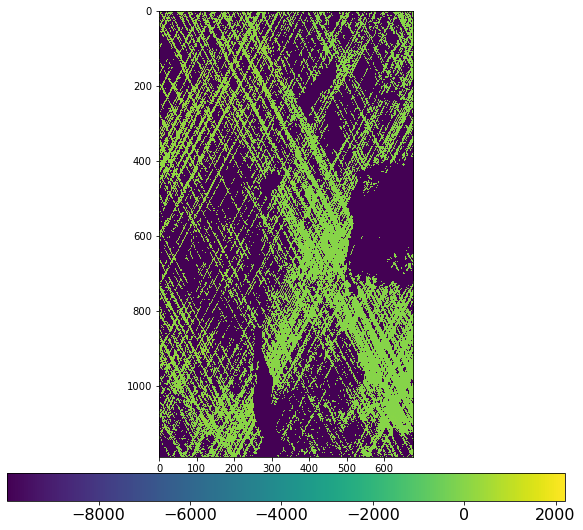

In [1]:
%matplotlib inline
import rasterio
import matplotlib.pyplot as plt
import numpy as np

#Read in GEDI GeoTIFF
file1 = '/shared_space/G1/gedi/sdat_2017_1_20221129_102544650.tif'
fp1 = rasterio.open(file1,'r')
gedi = fp1.read(1)

# Visualize GEDI 
plt.figure(figsize=(10,10))
plt.imshow(gedi)
cb = plt.colorbar(orientation='horizontal',pad=0.03)
cb.ax.tick_params(labelsize=16)
plt.show()

In [3]:
## bounding_box = [27.131553639569, -2.1908389202689, 30.89395883359299, 2.585117651875571] --> ideal

SyntaxError: invalid syntax (<ipython-input-3-b3bd2a7901d0>, line 3)

## a
Use gdalwarp to focus on study area as defined by bounding box

Might need to change resolution to match Sentinel-2 images?

In [6]:
%%bash
gdalwarp -overwrite -te 29.269398 -1.554519 29.482104 -1.375895 -tr 0.007797423980547 -0.007797423980547 -r near /shared_space/G1/gedi/sdat_2017_1_20221129_102544650.tif /shared_space/G1/gedi/GEDI_cropped.tif

Creating output file that is 27P x 23L.
Processing /shared_space/G1/gedi/sdat_2017_1_20221129_102544650.tif [1/1] : 0Using internal nodata values (e.g. -9999) for image /shared_space/G1/gedi/sdat_2017_1_20221129_102544650.tif.
Copying nodata values from source /shared_space/G1/gedi/sdat_2017_1_20221129_102544650.tif to destination /shared_space/G1/gedi/GEDI_cropped.tif.
...10...20...30...40...50...60...70...80...90...100 - done.


In [7]:
%%bash
gdalinfo /shared_space/G1/gedi/GEDI_cropped.tif

Driver: GTiff/GeoTIFF
Files: /shared_space/G1/gedi/GEDI_cropped.tif
Size is 27, 23
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (29.269397999999999,-1.375895000000000)
Pixel Size = (0.007797423980547,-0.007797423980547)
Metadata:
  AREA_OR_POINT=Area
  TIFFTAG_RESOLUTIONUNIT=2 (pixels/inch)
  TIFFTAG_XRESOLUTION=72
  TIFFTAG_YRESOLUTION=72
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (  29.2693980,  -1.3758950) ( 29d16' 9.83"E,  1d22'33.22"S)
Lower Left  (  29.2693980,  -1.5552358) ( 29d16' 9.83"E,  1d33'18.85"S)
Upper Right (  29.4799284,  -1.3758950) ( 29d28'47.74"E,  1d22'33.22"S)
Lower Right (  29.4799284,  -1.5552358) ( 29d28'47.74"E,  1d33'18.85"S)
Center      (  29.3746632,  -1.4655654) ( 29d22'28.79"E,  1d27

pj_obj_create: Open of /opt/conda/share/proj failed


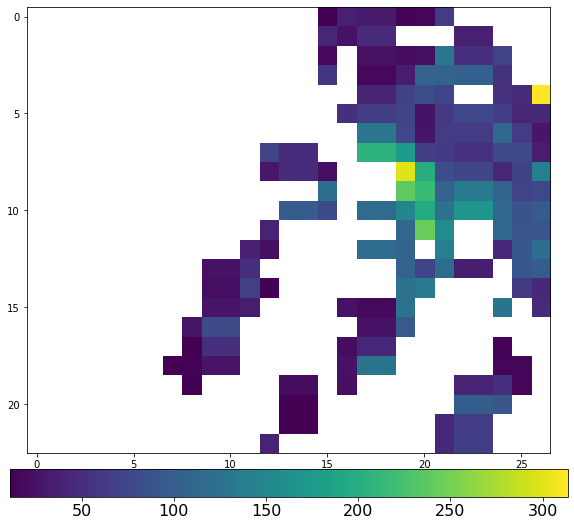

In [2]:
import numpy.ma as ma

#Read in Cropped GeoTIFF
file2 = '/shared_space/G1/gedi/GEDI_cropped.tif'
fp2 = rasterio.open(file2,'r')
gedi = fp2.read(1)

#Mask out area with NoData Values
gedi_m = np.ma.masked_array(gedi,gedi==-9999.0)

# Visualize Cropped GeoTIFF
plt.figure(figsize=(10,10))
plt.imshow(gedi_m)
cb = plt.colorbar(orientation='horizontal',pad=0.03)
cb.ax.tick_params(labelsize=16)
plt.show()

In [34]:
(np.array(np.where(gedi > -9999))).shape

(2, 194)

In [36]:
(np.array(np.where(gedi_m > 0 ))).shape

(2, 194)

## Sentinel-2 
Visualize Sentinel-2 Imagery and remove clouds using Cloud Mask Layer

Use RBG combination to determine best sentinel-2 image based on amount of cloud cover

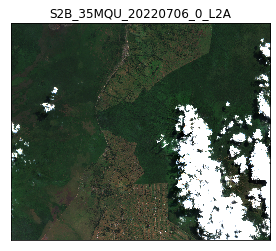

In [3]:
#Read in Blue, Green and Red band tifs
file1 = '/shared_space/G1/s2/S2B_35MQU_20220706_0_L2A/B02_cropped.tif'
fp1 = rasterio.open(file1,'r')
blue = fp1.read(1)

file2 = '/shared_space/G1/s2/S2B_35MQU_20220706_0_L2A/B03_cropped.tif'
fp2 = rasterio.open(file2,'r')
green = fp2.read(1)

file3 = '/shared_space/G1/s2/S2B_35MQU_20220706_0_L2A/B04_cropped.tif'
fp3 = rasterio.open(file3,'r')
red = fp3.read(1)

def norm(band): #normalize from 0-1
    band_min, band_max = band.min(), band.max()
    return ((band - band_min)/(band_max - band_min))

def bright(band):#brighten image
    alpha=0.1
    beta=0.1
    return np.clip(alpha*band+beta, 0,255)

b3 = norm(bright(red))
b2 = norm(bright(green))
b1 = norm(bright(blue))


# Create RGB
rgb = np.dstack((b3,b2,b1))

# Visualize RGB
plt.imshow(rgb)
plt.xticks([])
plt.yticks([])
plt.title('S2B_35MQU_20220706_0_L2A')
plt.show()

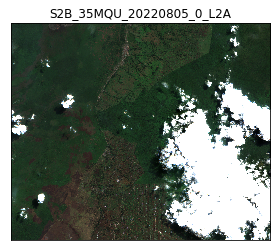

In [23]:
#Read in Blue, Green and Red band tifs
file1 = '/shared_space/G1/s2/S2B_35MQU_20220805_0_L2A/B02_cropped.tif'
fp1 = rasterio.open(file1,'r')
blue = fp1.read(1)

file2 = '/shared_space/G1/s2/S2B_35MQU_20220805_0_L2A/B03_cropped.tif'
fp2 = rasterio.open(file2,'r')
green = fp2.read(1)

file3 = '/shared_space/G1/s2/S2B_35MQU_20220805_0_L2A/B04_cropped.tif'
fp3 = rasterio.open(file3,'r')
red = fp3.read(1)

def norm(band): #normalize from 0-1
    band_min, band_max = band.min(), band.max()
    return ((band - band_min)/(band_max - band_min))

def bright(band):#brighten image
    alpha=0.1
    beta=0.1
    return np.clip(alpha*band+beta, 0,255)

b3 = norm(bright(red))
b2 = norm(bright(green))
b1 = norm(bright(blue))

# Create RGB
rgb = np.dstack((b3,b2,b1))

# Visualize RGB
plt.imshow(rgb)
plt.xticks([])
plt.yticks([])
plt.title('S2B_35MQU_20220805_0_L2A')
plt.show()

I want to do this using a for loop that reads in band 2, 3 and 4 from each of the different sentinel timesteps but I am unsure how to go about doing this rn. 

Would ideally be all the sentinel timesteps plotted similarly to the image above

## a 
Load the cloud mask and remove clouds from each band (would require a for-loop)

In [31]:
%%bash
gdalinfo /shared_space/G1/s2/S2B_35MQU_20220616_0_L2A/B02_cropped.tif

Driver: GTiff/GeoTIFF
Files: /shared_space/G1/s2/S2B_35MQU_20220616_0_L2A/B02_cropped.tif
Size is 2361, 1982
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (29.269397999999999,-1.375895000000000)
Pixel Size = (0.000090091486658,-0.000090123107972)
Metadata:
  AREA_OR_POINT=Area
  OVR_RESAMPLING_ALG=AVERAGE
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (  29.2693980,  -1.3758950) ( 29d16' 9.83"E,  1d22'33.22"S)
Lower Left  (  29.2693980,  -1.5545190) ( 29d16' 9.83"E,  1d33'16.27"S)
Upper Right (  29.4821040,  -1.3758950) ( 29d28'55.57"E,  1d22'33.22"S)
Lower Right (  29.4821040,  -1.5545190) ( 29d28'55.57"E,  1d33'16.27"S)
Center      (  29.3757510,  -1.4652070) ( 29d22'32.70"E,  1d27'54.75"S)
Band 1 Block=2361x1 Type=U

pj_obj_create: Open of /opt/conda/share/proj failed


In [18]:
28.79691667

28.79691667

In [18]:
%%bash
gdalinfo /shared_space/G1/s2/S2B_35MQU_20220616_0_L2A/B02_cropped.tif

Driver: GTiff/GeoTIFF
Files: /shared_space/G1/s2/S2B_35MQU_20220616_0_L2A/B02_cropped.tif
Size is 2361, 1982
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (29.269397999999999,-1.375895000000000)
Pixel Size = (0.000090091486658,-0.000090123107972)
Metadata:
  AREA_OR_POINT=Area
  OVR_RESAMPLING_ALG=AVERAGE
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (  29.2693980,  -1.3758950) ( 29d16' 9.83"E,  1d22'33.22"S)
Lower Left  (  29.2693980,  -1.5545190) ( 29d16' 9.83"E,  1d33'16.27"S)
Upper Right (  29.4821040,  -1.3758950) ( 29d28'55.57"E,  1d22'33.22"S)
Lower Right (  29.4821040,  -1.5545190) ( 29d28'55.57"E,  1d33'16.27"S)
Center      (  29.3757510,  -1.4652070) ( 29d22'32.70"E,  1d27'54.75"S)
Band 1 Block=2361x1 Type=U

pj_obj_create: Open of /opt/conda/share/proj failed


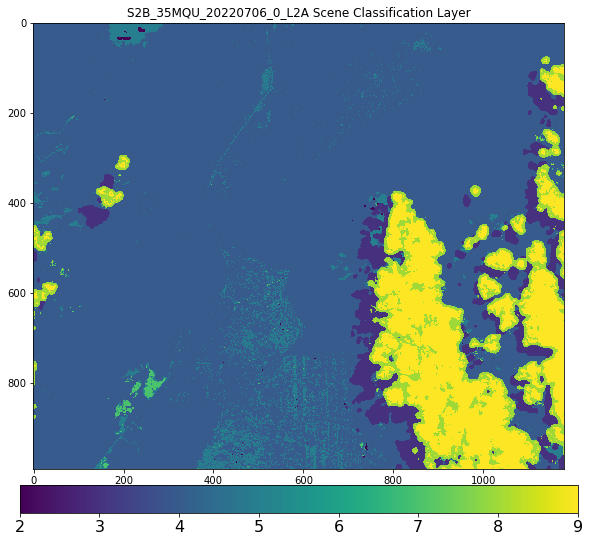

In [14]:
#Read in Cloud Mask
file4 = '/shared_space/G1/s2/S2B_35MQU_20220706_0_L2A/SCL_cropped.tif'
fp4 = rasterio.open(file4,'r')
cloud = fp4.read(1)

# Visualize Cloud Mask 
plt.figure(figsize=(10,10))
plt.imshow(cloud)
plt.title('S2B_35MQU_20220706_0_L2A Scene Classification Layer')
cb = plt.colorbar(orientation='horizontal',pad=0.03)
cb.ax.tick_params(labelsize=16)
plt.show()

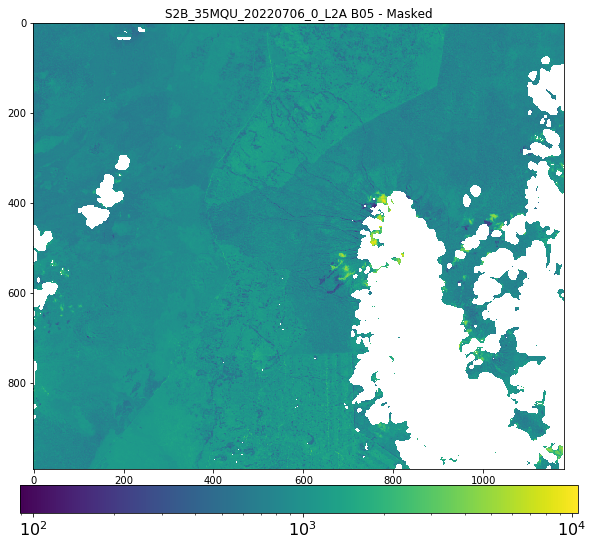

In [15]:
#Example of using cloud mask - on band 5. The other bands may need to upscale the resolution in order use the mask

#Read in Band 05 tif
file = '/shared_space/G1/s2/S2B_35MQU_20220706_0_L2A/B05_cropped.tif'
fp = rasterio.open(file,'r')
b5 = fp.read(1)



#Mask out cloud areas
b5_m = np.ma.masked_array(b5,cloud==9)
b5_m = np.ma.masked_array(b5_m,cloud==8)
b5_m = np.ma.masked_array(b5_m,cloud==3)
b5_m = np.ma.masked_array(b5_m,cloud==2)



# Visualize B05 with clouds masked
plt.figure(figsize=(10,10))
plt.imshow(b5_m, norm=colors.LogNorm())
plt.title('S2B_35MQU_20220706_0_L2A B05 - Masked')
cb = plt.colorbar(orientation='horizontal',pad=0.03)
cb.ax.tick_params(labelsize=16)
plt.show()

In [19]:
%%bash
gdalwarp -overwrite -tr 0.007797423980547 -0.007797423980547 -r near /shared_space/G1/s2/S2B_35MQU_20220706_0_L2A/B01_cropped.tif 20220706_B01_upscaled.tif
gdalwarp -overwrite -tr 0.007797423980547 -0.007797423980547 -r near /shared_space/G1/s2/S2B_35MQU_20220706_0_L2A/B02_cropped.tif 20220706_B02_upscaled.tif
gdalwarp -overwrite -tr 0.007797423980547 -0.007797423980547 -r near /shared_space/G1/s2/S2B_35MQU_20220706_0_L2A/B03_cropped.tif 20220706_B03_upscaled.tif
gdalwarp -overwrite -tr 0.007797423980547 -0.007797423980547 -r near /shared_space/G1/s2/S2B_35MQU_20220706_0_L2A/B04_cropped.tif 20220706_B04_upscaled.tif
gdalwarp -overwrite -tr 0.007797423980547 -0.007797423980547 -r near /shared_space/G1/s2/S2B_35MQU_20220706_0_L2A/B05_cropped.tif 20220706_B05_upscaled.tif
gdalwarp -overwrite -tr 0.007797423980547 -0.007797423980547 -r near /shared_space/G1/s2/S2B_35MQU_20220706_0_L2A/B06_cropped.tif 20220706_B06_upscaled.tif
gdalwarp -overwrite -tr 0.007797423980547 -0.007797423980547 -r near /shared_space/G1/s2/S2B_35MQU_20220706_0_L2A/B07_cropped.tif 20220706_B07_upscaled.tif
gdalwarp -overwrite -tr 0.007797423980547 -0.007797423980547 -r near /shared_space/G1/s2/S2B_35MQU_20220706_0_L2A/B08_cropped.tif 20220706_B08_upscaled.tif
gdalwarp -overwrite -tr 0.007797423980547 -0.007797423980547 -r near /shared_space/G1/s2/S2B_35MQU_20220706_0_L2A/B09_cropped.tif 20220706_B09_upscaled.tif
gdalwarp -overwrite -tr 0.007797423980547 -0.007797423980547 -r near /shared_space/G1/s2/S2B_35MQU_20220706_0_L2A/B11_cropped.tif 20220706_B11_upscaled.tif
gdalwarp -overwrite -tr 0.007797423980547 -0.007797423980547 -r near /shared_space/G1/s2/S2B_35MQU_20220706_0_L2A/B12_cropped.tif 20220706_B12_upscaled.tif
gdalwarp -overwrite -tr 0.007797423980547 -0.007797423980547 -r near /shared_space/G1/s2/S2B_35MQU_20220706_0_L2A/B8A_cropped.tif 20220706_B8A_upscaled.tif

Creating output file that is 27P x 23L.
Processing /shared_space/G1/s2/S2B_35MQU_20220706_0_L2A/B01_cropped.tif [1/1] : 0Using internal nodata values (e.g. 0) for image /shared_space/G1/s2/S2B_35MQU_20220706_0_L2A/B01_cropped.tif.
Copying nodata values from source /shared_space/G1/s2/S2B_35MQU_20220706_0_L2A/B01_cropped.tif to destination 20220706_B01_upscaled.tif.
...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 27P x 23L.
Processing /shared_space/G1/s2/S2B_35MQU_20220706_0_L2A/B02_cropped.tif [1/1] : 0Using internal nodata values (e.g. 0) for image /shared_space/G1/s2/S2B_35MQU_20220706_0_L2A/B02_cropped.tif.
Copying nodata values from source /shared_space/G1/s2/S2B_35MQU_20220706_0_L2A/B02_cropped.tif to destination 20220706_B02_upscaled.tif.
...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 27P x 23L.
Processing /shared_space/G1/s2/S2B_35MQU_20220706_0_L2A/B03_cropped.tif [1/1] : 0Using internal nodata v

In [5]:
%%bash
gdalwarp -overwrite -tr 0.007797423980547 -0.007797423980547 -r near /shared_space/G1/s2/S2B_35MQU_20220706_0_L2A/SCL_cropped.tif 20220706_SCL_upscaled.tif

Creating output file that is 27P x 23L.
Processing /shared_space/G1/s2/S2B_35MQU_20220706_0_L2A/SCL_cropped.tif [1/1] : 0Using internal nodata values (e.g. 0) for image /shared_space/G1/s2/S2B_35MQU_20220706_0_L2A/SCL_cropped.tif.
Copying nodata values from source /shared_space/G1/s2/S2B_35MQU_20220706_0_L2A/SCL_cropped.tif to destination 20220706_SCL_upscaled.tif.
...10...20...30...40...50...60...70...80...90...100 - done.


In [6]:
%%bash
gdalinfo 20220706_SCL_upscaled.tif

Driver: GTiff/GeoTIFF
Files: 20220706_SCL_upscaled.tif
Size is 27, 23
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (29.269397999999999,-1.375895000000000)
Pixel Size = (0.007797423980547,-0.007797423980547)
Metadata:
  AREA_OR_POINT=Area
  OVR_RESAMPLING_ALG=MODE
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (  29.2693980,  -1.3758950) ( 29d16' 9.83"E,  1d22'33.22"S)
Lower Left  (  29.2693980,  -1.5552358) ( 29d16' 9.83"E,  1d33'18.85"S)
Upper Right (  29.4799284,  -1.3758950) ( 29d28'47.74"E,  1d22'33.22"S)
Lower Right (  29.4799284,  -1.5552358) ( 29d28'47.74"E,  1d33'18.85"S)
Center      (  29.3746632,  -1.4655654) ( 29d22'28.79"E,  1d27'56.04"S)
Band 1 Block=27x23 Type=Byte, ColorInterp=Gray
  NoData Value=0


pj_obj_create: Open of /opt/conda/share/proj failed


In [7]:
%%bash
gdalinfo 20220706_B05_upscaled.tif

Driver: GTiff/GeoTIFF
Files: 20220706_B05_upscaled.tif
Size is 27, 23
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (29.269397999999999,-1.375895000000000)
Pixel Size = (0.007797423980547,-0.007797423980547)
Metadata:
  AREA_OR_POINT=Area
  OVR_RESAMPLING_ALG=AVERAGE
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (  29.2693980,  -1.3758950) ( 29d16' 9.83"E,  1d22'33.22"S)
Lower Left  (  29.2693980,  -1.5552358) ( 29d16' 9.83"E,  1d33'18.85"S)
Upper Right (  29.4799284,  -1.3758950) ( 29d28'47.74"E,  1d22'33.22"S)
Lower Right (  29.4799284,  -1.5552358) ( 29d28'47.74"E,  1d33'18.85"S)
Center      (  29.3746632,  -1.4655654) ( 29d22'28.79"E,  1d27'56.04"S)
Band 1 Block=27x23 Type=UInt16, ColorInterp=Gray
  NoData Value=0

pj_obj_create: Open of /opt/conda/share/proj failed


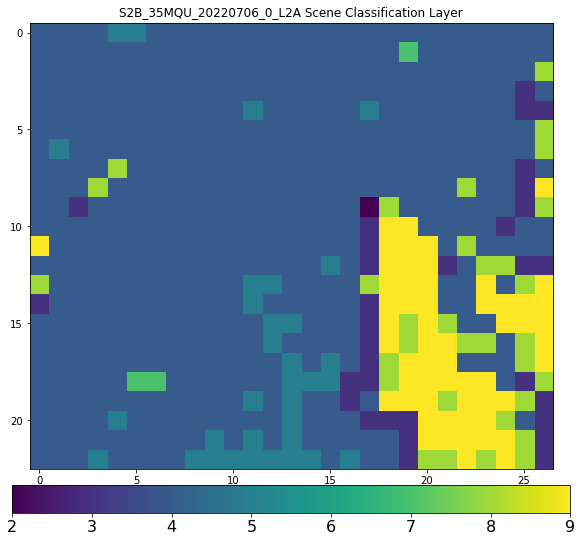

In [3]:
#Read in Cloud Mask
file4 = '20220706_SCL_upscaled.tif'
fp4 = rasterio.open(file4,'r')
cloud = fp4.read(1)

# Visualize Cloud Mask 
plt.figure(figsize=(10,10))
plt.imshow(cloud)
plt.title('S2B_35MQU_20220706_0_L2A Scene Classification Layer')
cb = plt.colorbar(orientation='horizontal',pad=0.03)
cb.ax.tick_params(labelsize=16)
plt.show()

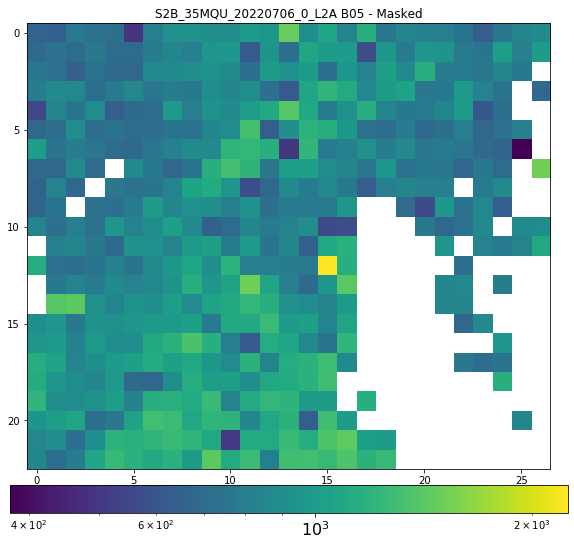

In [4]:
#Example of using cloud mask - on band 5. The other bands may need to upscale the resolution in order use the mask
from matplotlib import colors
#Read in Band 05 tif
file = '20220706_B05_upscaled.tif'
fp = rasterio.open(file,'r')
b5 = fp.read(1)



#Mask out cloud areas
b5 = np.ma.masked_array(b5,cloud==9)
b5 = np.ma.masked_array(b5,cloud==8)
b5 = np.ma.masked_array(b5,cloud==3)
b5 = np.ma.masked_array(b5,cloud==2)




# Visualize B05 with clouds masked
plt.figure(figsize=(10,10))
plt.imshow(b5, norm=colors.LogNorm()) 
plt.title('S2B_35MQU_20220706_0_L2A B05 - Masked')
cb = plt.colorbar(orientation='horizontal',pad=0.03)
cb.ax.tick_params(labelsize=16)
plt.show()

To do:
1. Remove clouds from each band (may need to make sure all the resolutions are the same using gdalwarp)
2. Compile all the bands and create any relevant indicies (NDVI, EVI, etc...)
3. Build model using SKLearn

In [5]:
#remove clouds using cloud mask
#load cloud mask and iterate through bands

In [6]:
#Read in all the data
import rasterio
%matplotlib inline
import matplotlib.pyplot as plt
vars = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B11', 'B12', 'B8A']
data = {}
for var in vars:
    src = rasterio.open('20220706_%s_upscaled.tif' % var)
    data[var] = src.read(1)
    src.close()


1
B01 (23, 27)
2
B02 (23, 27)
3
B03 (23, 27)
4
B04 (23, 27)
5
B05 (23, 27)
6
B06 (23, 27)
7
B07 (23, 27)
8
B08 (23, 27)
9
B09 (23, 27)
10
B11 (23, 27)
11
B12 (23, 27)
12
B8A (23, 27)


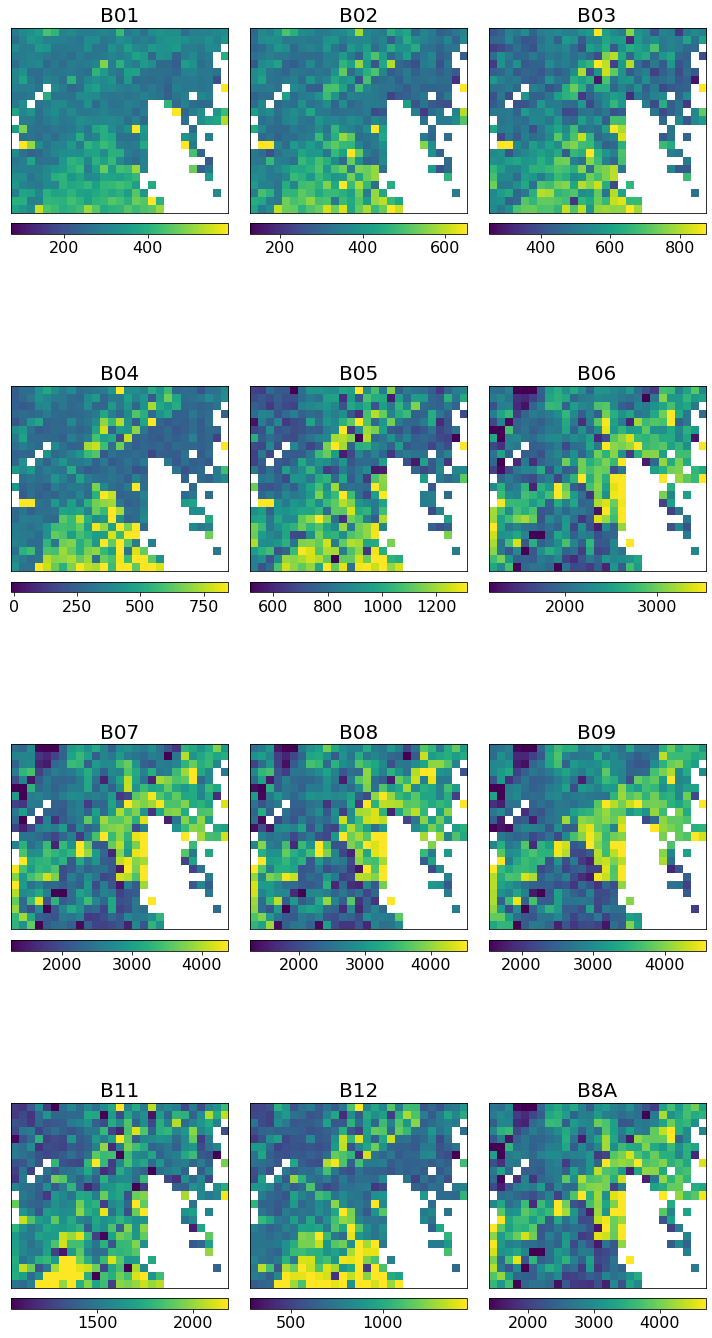

In [7]:
#Plot all the data
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,30))
i = 0
for var in data:
    i += 1
    print(i)
    print(var,data[var].shape)
    plt.subplot(6,3,i)
    plt.xticks([])
    plt.yticks([])
    
    #Mask out cloud areas
    data[var] = np.ma.masked_array(data[var],cloud==9)
    data[var] = np.ma.masked_array(data[var],cloud==8)
    data[var] = np.ma.masked_array(data[var],cloud==3)
    data[var] = np.ma.masked_array(data[var],cloud==2)

    vmin = np.mean(data[var]) - 2*np.std(data[var])
    vmax = np.mean(data[var]) + 2*np.std(data[var])
    plt.imshow(data[var],vmin=vmin,vmax=vmax)
    cb = plt.colorbar(orientation='horizontal',pad=0.03)
    cb.ax.tick_params(labelsize=16)
    plt.title(var,fontsize=20)
plt.tight_layout()
plt.show()

In [101]:
b_var

masked_array(
  data=[[2667, 2597, 2979, 1473, 1134, 574, 2523, 3149, 3399, 3040, 3387,
         2851, 2374, 3058, 3209, 2841, 2716, 3075, 2609, 2276, 1998,
         3284, 3707, 3188, 3677, 3986, 3317],
        [2775, 2955, 2830, 1977, 1811, 2104, 2384, 3359, 3521, 3251,
         2471, 2826, 2789, 3221, 2812, 2768, 2571, 2735, 2604, 1227,
         2754, 4275, 3072, 3339, 3729, 3435, 3541],
        [2405, 2920, 2917, 1790, 1710, 2555, 2717, 3635, 3585, 2386,
         3223, 2989, 2906, 3951, 3770, 3284, 2289, 2314, 2750, 2721,
         2878, 3326, 3963, 3479, 3598, 3055, --],
        [2904, 3531, 3636, 2112, 2469, 2803, 2599, 2755, 3034, 3414,
         3025, 2440, 2931, 2585, 3812, 3275, 2800, 3276, 2814, 2737,
         3890, 4400, 4826, 3464, 3004, --, 2897],
        [2281, 2850, 1580, 2438, 2694, 2468, 2481, 2603, 2741, 3479,
         2659, 1664, 2811, 3309, 4247, 3336, 2622, 1646, 4172, 3921,
         3906, 3926, 4983, 2461, 2976, --, --],
        [1415, 1401, 3564, 2599, 2685, 2423, 

In [8]:
obs = np.array(gedi_m.reshape(gedi_m.size))

In [9]:
y = []
for i in range(obs.size):
    if obs[i] < 100 and obs[i] >= 0:
        y.append(2)
    elif obs[i] >= 100:
        y.append(1)
        
y = np.array(y)
#y_predict =  np.ma.masked_array(y, y==0)
y.shape

(194,)

In [10]:
ym = []
for i in range(obs.size):
    if obs[i] == -9999:
        ym.append(0)
    elif obs[i] >= 100:
        ym.append(1)
    else:
        ym.append(2)
ym = np.array(ym)
ym.shape

(621,)

In [16]:
np.unique(y)

array([1, 2])

In [11]:
site_predict = []

for var in vars:
    tmp = data[var].reshape(data[var].size)
    col = []
    for i in range(obs.size):
        if ym[i] == 1:
            col.append(tmp[i])
        elif ym[i] == 2:
            col.append(tmp[i])
    site_predict.append(col)
Xobs = np.array(site_predict).T
Xobs[np.isnan(Xobs)] = -9999

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Warning: converting a masked element to nan.
  if sys.path[0] == '':


In [12]:
#use y array with 0s and just append -9999 if y[i] == 0

#cloud mask on top of gedi mask

In [13]:
Xobs[np.isnan(Xobs)] = -9999
Xobs = np.ma.masked_array(Xobs, Xobs == -9999)

In [14]:
Xobs.shape

(194, 12)

In [15]:
Xobs

masked_array(
  data=[[306.0, 352.0, 546.0, ..., 1735.0, 970.0, 2841.0],
        [266.0, 345.0, 514.0, ..., 1514.0, 817.0, 2716.0],
        [323.0, 456.0, 763.0, ..., 2068.0, 1142.0, 3075.0],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20)

In [16]:
X_predict = []
for var in vars:
    tmp = data[var].reshape(data[var].size)
    col = []
    for i in range(obs.size):
        if ym[i] == 1:
            col.append(tmp[i])
        elif ym[i] == 2:
            col.append(tmp[i])
        elif ym[i] == 0:
            col.append(-9999)
    X_predict.append(col)
X = np.array(X_predict)
X[np.isnan(X)] = -9999
X = np.ma.masked_array(X, X == -9999).T

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Warning: converting a masked element to nan.
  del sys.path[0]


In [55]:
X.shape
ym.shape

(194,)

In [21]:
#create X array of predictors
X = []
for var in vars:
    tmp = (data[var]).reshape(data[var].size).astype(np.int16)
    tmp.set_fill_value(-9999)
    #tmp = np.ma.masked_array(tmp, tmp == 999999)
    X.append(tmp)
X = np.ma.masked_array(X, X == -9999).T

In [30]:
X[]

masked_array(data=[304, 382, 516, 337, 805, 1901, 2269, 2577, 2568, 1459,
                   709, 2523],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value=999999,
            dtype=int16)

In [217]:
tmp.get_fill_value()
#ma.MaskedArray.set_fill_value(value=None)

55537

In [149]:
#Mask out cloud areas
    data[var] = np.ma.masked_array(data[var],cloud==9)
    data[var] = np.ma.masked_array(data[var],cloud==8)
    data[var] = np.ma.masked_array(data[var],cloud==3)
    data[var] = np.ma.masked_array(data[var],cloud==2)


IndentationError: unexpected indent (<ipython-input-149-2ac787644fdf>, line 2)

In [59]:
import sklearn.ensemble
#Random forest
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=1, oob_score=True)

#Fit the random forest
clf = clf.fit(Xobs,y)

#Print out of bag estimate of accuracy
print("Accuracy -",clf.oob_score_)

Accuracy - 0.7680412371134021


In [60]:
#Predict the soil group at each pixel
Ypred = clf.predict(X)

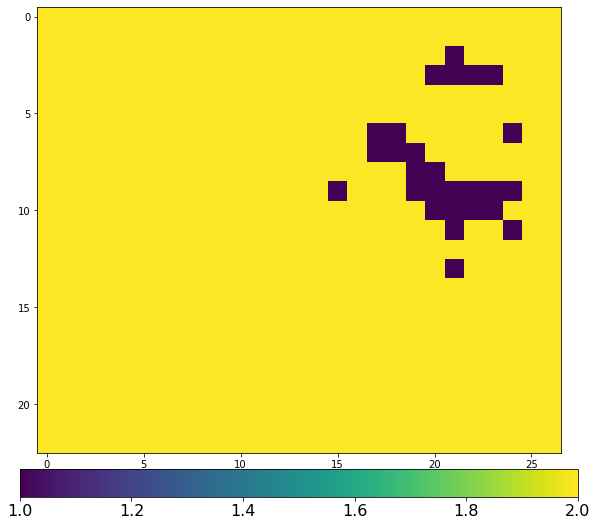

In [61]:
import matplotlib.patches as mpatches
plt.figure(figsize=(10,10))
im = plt.imshow(Ypred.reshape(data['B01'].shape))
cb = plt.colorbar(orientation='horizontal',pad=0.03)
cb.ax.tick_params(labelsize=16)

#values = np.unique(Ypred.ravel())
# get the colors of the values, according to the 
# colormap used by imshow
#colors = [ im.cmap(im.norm(value)) for value in values]
# create a patch (proxy artist) for every color 
#patches = [ mpatches.Patch(color=colors[i], label="Soil Type - {l}".format(l=yobs[i]) ) for i in range(len(values)) ]
# put patches as legend-handles into the legend
#plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. ,fontsize = 20)

plt.show()

In [ ]:
# Visualize B05 with clouds masked
plt.figure(figsize=(10,10))
plt.imshow(y, norm=colors.LogNorm()) 
plt.title('S2B_35MQU_20220706_0_L2A B05 - Masked')
cb = plt.colorbar(orientation='horizontal',pad=0.03)
cb.ax.tick_params(labelsize=16)
plt.show()

In [ ]:
#Read in all the data
import rasterio
%matplotlib inline
import matplotlib.pyplot as plt
vars = ['WELD_Band1_TOA_REF','WELD_Band2_TOA_REF','WELD_Band3_TOA_REF','WELD_Band4_TOA_REF',
        'WELD_Band5_TOA_REF','WELD_Band61_TOA_BT','WELD_Band62_TOA_BT','WELD_Band7_TOA_REF',
        'WELD_NDVI_TOA','nlcd_land_cover','nlcd_impervious','nlcd_tree_canopy']
data = {}
for var in vars:
    src = rasterio.open('../Workspace/%s.tif' % var)
    data[var] = src.read(1)
    src.close()

In [ ]:
#Plot all the data
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,30))
i = 0
for var in data:
    if var in ['nlcd_land_cover']:continue
    i += 1
    print(i)
    print(var,data[var].shape)
    plt.subplot(6,2,i)
    plt.xticks([])
    plt.yticks([])
    if var not in ['nlcd_impervious','nlcd_tree_canopy']:
        vmin = np.mean(data[var]) - 2*np.std(data[var])
        vmax = np.mean(data[var]) + 2*np.std(data[var])
        plt.imshow(data[var],vmin=vmin,vmax=vmax)
    else:
        plt.imshow(data[var])
    cb = plt.colorbar(orientation='horizontal',pad=0.03)
    cb.ax.tick_params(labelsize=16)
    plt.title(var,fontsize=20)
plt.tight_layout()
plt.show()

# decision trees lecture has some bash code for reprojecting bands, etc
# Feature engineering for the vegetative indicies 


Aggregate each pixel for sentinel 2
- Compile multiple sentinel-2 images
- Remove clouds
- Compute mean value for each pixel
- Use aggregated image as predictor (should give value for each pixel…)

